In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Chargement des données
data = pd.read_csv("./data/Reviews.csv")  

# Affiche les premières lignes
data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import re

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

data['clean_text'] = data['Text'].apply(preprocess_text)  


In [ ]:
def map_score(score):
    if score <= 2:
        return 0  # Négatif
    elif score == 3:
        return 1  # Neutre
    else:
        return 2  # Positif

data['label'] = data['Score'].apply(map_score)  

X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Modèle avancé avec un SVM dans un pipeline

In [7]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=100000)),
    ('clf', LinearSVC(class_weight='balanced'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Négatif", "Neutre", "Positif"]))


              precision    recall  f1-score   support

     Négatif       0.79      0.82      0.80     16407
      Neutre       0.55      0.58      0.56      8528
     Positif       0.96      0.95      0.95     88756

    accuracy                           0.90    113691
   macro avg       0.76      0.78      0.77    113691
weighted avg       0.90      0.90      0.90    113691



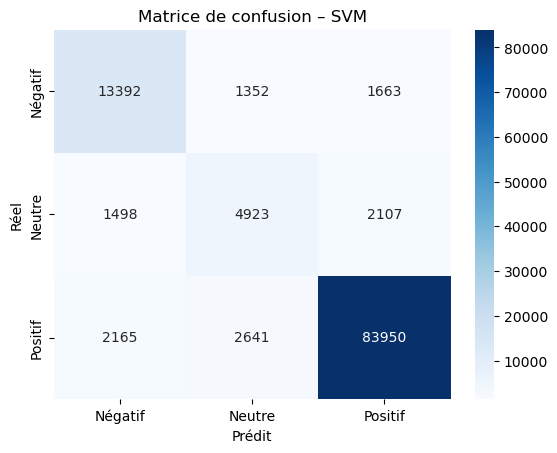

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Négatif", "Neutre", "Positif"], yticklabels=["Négatif", "Neutre", "Positif"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – SVM")
plt.show()
